<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2021_2022/Pr%C3%A0ctiques/Pr%C3%A0ctica1_FirstPythonExercise_Solucions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pràctica 1: El meu primer programa en Python!!!** [Solucions]


### <font color='green'>**> ENTREGA**</font>

En aquesta entrega hauràs de generar uns parells de punts, on un té un soroll associat i fa que es desviï d'una recta, és a dir:

$$
y_i = x_i + \epsilon_i
$$

Considerarem dos casos:

* No hi ha soroll $\Rightarrow \epsilon_i = 0$
* El soroll està distribuit com una normal $\Rightarrow \epsilon_i \sim N(0,5)$

Farem unes gràfiques (x,y), calcularem el factor de correlació, i graficarem les distribucions marginals en $x$ i $y$.

---

1) Fes una gràfica d'un conjunt de $N = 10000$ punts $(x,y)$ on els x estan equiespaiats en l'interval $[0,10]$ i $y_i = x_i$ **[1.5 punts]**. També fes un parell de gràfiques de les distribucions marginals en $x$ i $y$, fent histogrames amb 100 bins. **[1.5 punts]**

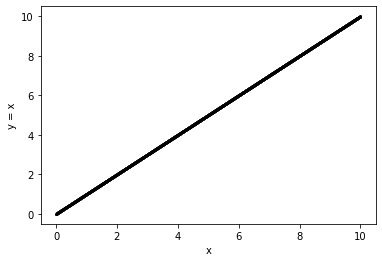

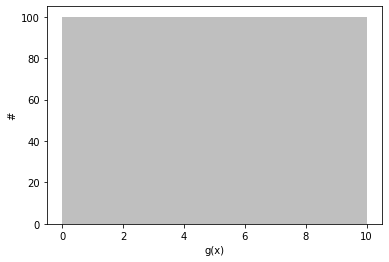

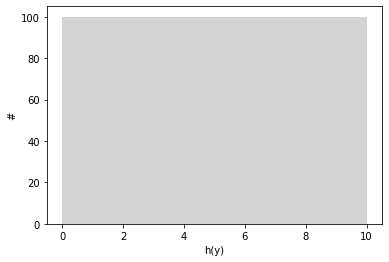

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000 
x1 = np.linspace(0,10,N) # Aqui tendrias que haber hecho blah....
y1 = x1

plt.plot(x1,y1,'ko',markersize=1)
plt.xlabel("x")
plt.ylabel("y = x")
plt.show() 

plt.hist(x1,bins=100, facecolor='grey', alpha=0.5)
plt.xlabel("g(x)")
plt.ylabel("#")
plt.show()

plt.hist(y1,bins=100, facecolor='darkgrey', alpha=0.5)
plt.xlabel("h(y)")
plt.ylabel("#")
plt.show()


2) Fes una gràfica d'un conjunt de $N = 10000$ punts $(x,y)$ on els x estan equiespaiats en l'interval $[0,10]$ i $y_i = x_i + \epsilon_i$, on $\epsilon_i \sim N(0,5)$ (és a dir, segueix una distribució normal, amb $\mu$ = 0 i $\sigma$ = 5) **[1.5 punts]**. També fes un parell de gràfiques de les distribucions marginals en $x$ i $y$, fent histogrames amb 100 bins. **[1.5 punts]**

<font color='orange'>**Nota**</font> Vam veure que podíem trobar informació sobre les funcions de la normal a scipy amb

`?stats.norm`

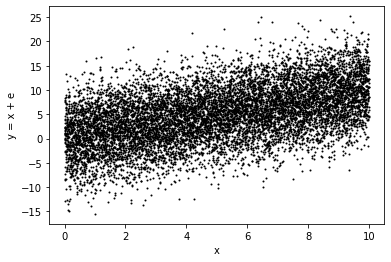

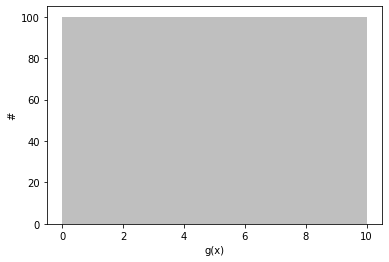

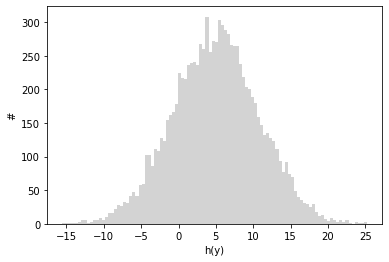

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

N = 10000
x2 = np.linspace(0,10,N)
e = stats.norm.rvs(loc=0,scale=5,size=N)
y2 = x2 + e

plt.plot(x2,y2,'ko',markersize=1)
plt.xlabel("x")
plt.ylabel("y = x + e")
plt.show()

plt.hist(x2,bins=100, facecolor='grey', alpha=0.5)
plt.xlabel("g(x)")
plt.ylabel("#")
plt.show()

plt.hist(y2,bins=100, facecolor='darkgrey', alpha=0.5)
plt.xlabel("h(y)")
plt.ylabel("#")
plt.show()

Fixeu-vos que aquesta marginal en $y$ no segueix la distribució normal del soroll, ja que és un soroll gaussià que heu afegit a damunt de la recta:

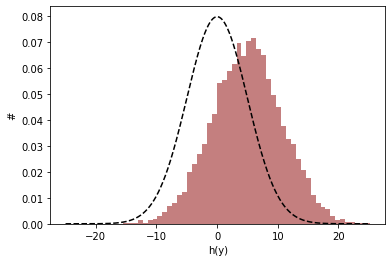

In [25]:
xg = np.linspace(-25,25,1000)
yg_pdf = stats.norm.pdf(xg, loc=0,scale=5) # Evaluo la PDF d'una normal amb mu=0 i sigma=5, per 1000 punts de -25 a 25.

plt.plot(xg, yg_pdf, 'k--')
plt.hist(y2,bins=50, density=True, facecolor='darkred', alpha=0.5) # Poso el density=True per normalitzar l'histograma
plt.xlabel("h(y)")
plt.ylabel("#")
plt.show()

De fet, si a cada punt que poso en aquesta marginal, li resto la part lineal, llavors si que hauria de veure només el soroll que segueix la normal. Anem a veure:

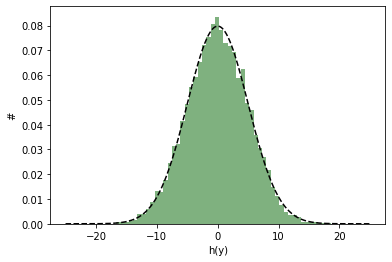

In [24]:
s = y2 - x2 # Si a cada y2 li trec la part x2, em queda només el soroll...

plt.plot(xg, yg_pdf, 'k--')
plt.hist(s,bins=50, density=True, facecolor='darkgreen', alpha=0.5) # Poso el density=True per normalitzar l'histograma
plt.xlabel("h(y)")
plt.ylabel("#")
plt.show() # Ara si!

3) Calcula el factor de correlació entre les variables $x$ i $y$ que has generat en els dos exemples. **[2 punts]**

<font color='orange'>**Nota**</font> Python té la funció $pearsonr$ per a calcular la correlació entre variables:

```
from scipy.stats import pearsonr
```
`?stats.pearsonr`

In [3]:
from scipy.stats import pearsonr

print("Cas 1:", pearsonr(x1, y1)[0])
print("Cas 2:", pearsonr(x2, y2)[0])

print("Veiem que la correlació perfecta es perd si afegim soroll Gaussià")

Cas 1: 1.0
Cas 2: 0.4989384152260714
Veiem que la correlació perfecta es perd si afegim soroll Gaussià


4) Aproximadament quina $\sigma$ ha de tenir el soroll perquè el factor de correlació sigui menor de 0.15? Genera moltes realitzacions amb soroll diferent i calcula el factor de correlació per a cadascuna d'elles per a trobar el cas que es proposa. **[2 punts]**

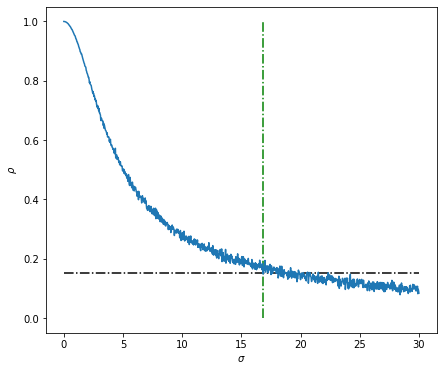

sigma on rho < 0.15 = approx. 16.85


In [4]:
# Generem moltes realitzacions amb soroll diferent i calculem el factor de correlació per a cadascuna

Ns=1000
sigmas = np.linspace(0,30,Ns)

N = 10000
x3 = np.linspace(0,10,N)
corrS = []
sigmaAbove = []

for sigma in sigmas:

  e = stats.norm.rvs(loc=0,scale=sigma,size=N)
  y3 = x3 + e
  corrS.append(pearsonr(x3, y3)[0])
  if corrS[-1] < 0.15:
    sigmaAbove.append(sigma)

plt.figure(figsize=(7, 6))
plt.plot(sigmas,corrS)
plt.hlines(0.15,0,sigmas[-1],linestyles='-.')
plt.vlines(sigmaAbove[0],0,1,color='g',linestyles='-.')
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$\rho$')
plt.show()

print("sigma on rho < 0.15 = approx. %5.2f" % sigmaAbove[0])